In [4]:
install.packages(c("quantmod","forecast", "tseries", "ggplot2", "dplyr"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’, ‘quadprog’




In [5]:
library(quantmod)
library(forecast)
library(tseries)
library(ggplot2)
library(dplyr)


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.       

In [6]:
symbol <- "AAPL"
start_date <- as.Date("2020-01-01")
end_date <- Sys.Date()

getSymbols(symbol, src = "yahoo", from = start_date, to = end_date)


stock_data <- get(symbol)
close_prices <- Cl(stock_data)

[1] "AAPL"

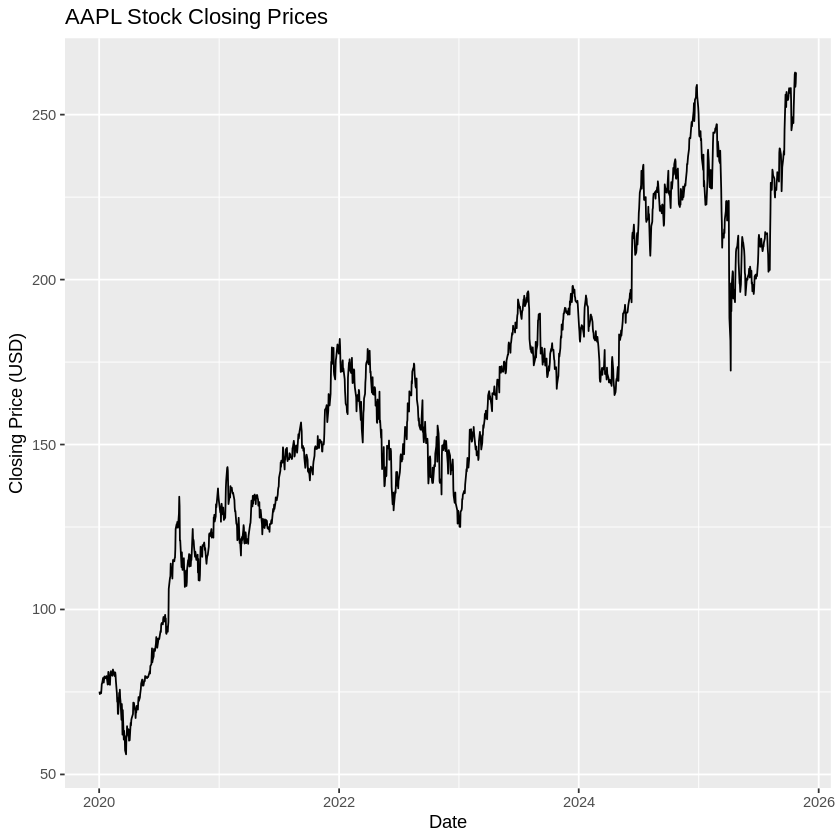

In [7]:
autoplot(close_prices) +
  ggtitle(paste(symbol, "Stock Closing Prices")) +
  xlab("Date") + ylab("Closing Price (USD)")


In [8]:
stock_ts <- ts(close_prices, frequency = 252)

In [9]:
train_size <- floor(0.8 * length(stock_ts))
train_data <- stock_ts[1:train_size]
test_data <- stock_ts[(train_size + 1):length(stock_ts)]


In [10]:
fit <- auto.arima(train_data)
summary(fit)

Series: train_data 
ARIMA(0,1,0) with drift 

Coefficients:
       drift
      0.1299
s.e.  0.0789

sigma^2 = 7.283:  log likelihood = -2816.38
AIC=5636.76   AICc=5636.78   BIC=5646.89

Training set error measures:
                       ME     RMSE      MAE         MPE     MAPE      MASE
Training set 6.412108e-05 2.696407 1.995978 -0.02116891 1.440663 0.9970064
                    ACF1
Training set -0.02003403

In [11]:
forecast_steps <- length(test_data)
pred <- forecast(fit, h = forecast_steps)


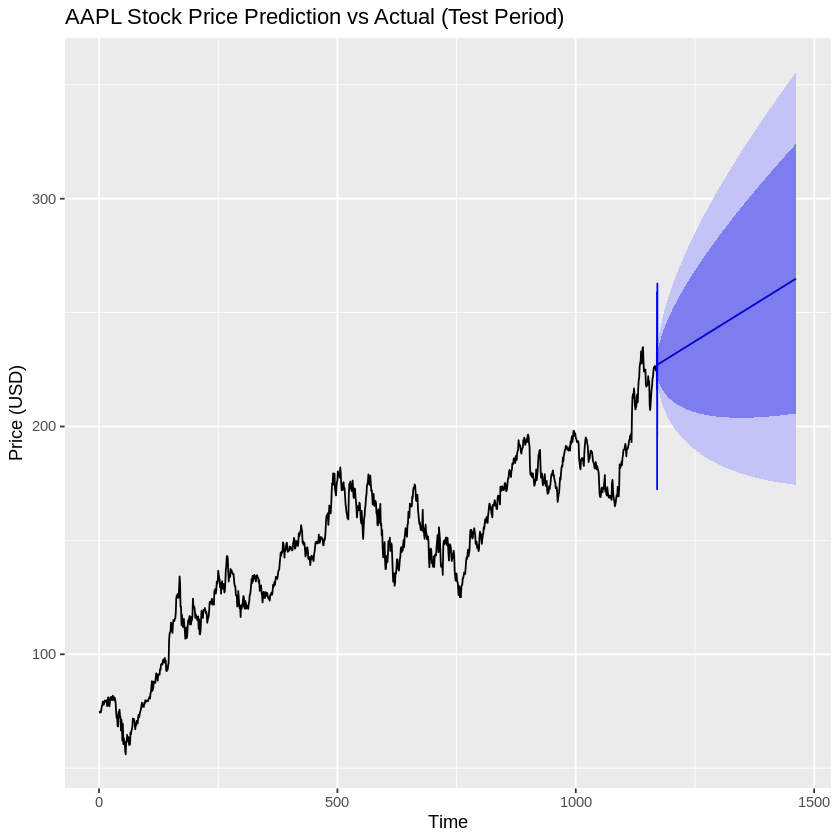

In [13]:
autoplot(pred) +
  autolayer(ts(test_data, start = end(time(train_data)) + 1, frequency = 252),
            series = "Actual", color = "blue") +
  ggtitle(paste(symbol, "Stock Price Prediction vs Actual (Test Period)")) +
  xlab("Time") + ylab("Price (USD)")


In [14]:
accuracy_measures <- accuracy(pred, test_data)
print(accuracy_measures)


                        ME      RMSE       MAE         MPE      MAPE       MASE
Training set  6.412108e-05  2.696407  1.995978 -0.02116891  1.440663  0.9970064
Test set     -2.010427e+01 29.249579 22.327174 -9.61915326 10.512291 11.1525954
                    ACF1
Training set -0.02003403
Test set              NA


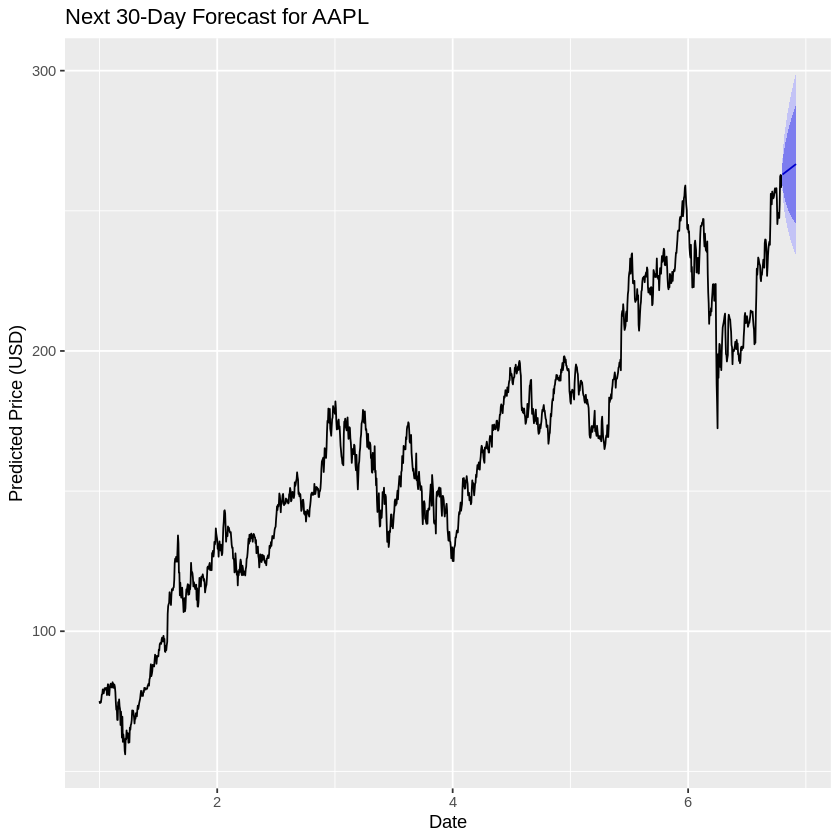

In [15]:
final_model <- auto.arima(stock_ts)
future_forecast <- forecast(final_model, h = 30)

autoplot(future_forecast) +
  ggtitle(paste("Next 30-Day Forecast for", symbol)) +
  xlab("Date") + ylab("Predicted Price (USD)")

In [16]:
forecast_df <- data.frame(
  Date = seq(from = end(close_prices), by = "day", length.out = 30),
  Forecast = as.numeric(future_forecast$mean)
)
write.csv(forecast_df, paste0(symbol, "_forecast.csv"), row.names = FALSE)

cat("✅ Accuracy results (train/test):\n")
print(accuracy_measures)

cat("\n✅ Forecast saved to:", paste0(symbol, "_forecast.csv"), "\n")

✅ Accuracy results (train/test):
                        ME      RMSE       MAE         MPE      MAPE       MASE
Training set  6.412108e-05  2.696407  1.995978 -0.02116891  1.440663  0.9970064
Test set     -2.010427e+01 29.249579 22.327174 -9.61915326 10.512291 11.1525954
                    ACF1
Training set -0.02003403
Test set              NA

✅ Forecast saved to: AAPL_forecast.csv 
